In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [3]:
df = pd.read_csv(r'C:\Users\dhana\Downloads\MAINFLOW\Global Superstore.csv', encoding='latin1')


Display the first few rows of the dataset

In [4]:
print("Initial Dataset")
print(df.head())

Initial Dataset
   Row ID         Order ID  Order Date   Ship Date     Ship Mode Customer ID  \
0   32298   CA-2012-124891  31-07-2012  31-07-2012      Same Day    RH-19495   
1   26341    IN-2013-77878  05-02-2013  07-02-2013  Second Class    JR-16210   
2   25330    IN-2013-71249  17-10-2013  18-10-2013   First Class    CR-12730   
3   13524  ES-2013-1579342  28-01-2013  30-01-2013   First Class    KM-16375   
4   47221     SG-2013-4320  05-11-2013  06-11-2013      Same Day     RH-9495   

      Customer Name      Segment           City            State  ...  \
0       Rick Hansen     Consumer  New York City         New York  ...   
1     Justin Ritter    Corporate     Wollongong  New South Wales  ...   
2      Craig Reiter     Consumer       Brisbane       Queensland  ...   
3  Katherine Murray  Home Office         Berlin           Berlin  ...   
4       Rick Hansen     Consumer          Dakar            Dakar  ...   

         Product ID    Category Sub-Category  \
0   TEC-AC-10003

DATA CLEANING

In [5]:
print("\nMissing values before cleaning:")
print(df.isnull().sum())


Missing values before cleaning:
Row ID                0
Order ID              0
Order Date            0
Ship Date             0
Ship Mode             0
Customer ID           0
Customer Name         0
Segment               0
City                  0
State                 0
Country               0
Postal Code       41296
Market                0
Region                0
Product ID            0
Category              0
Sub-Category          0
Product Name          0
Sales                 0
Quantity              0
Discount              0
Profit                0
Shipping Cost         0
Order Priority        0
dtype: int64


In [6]:
df['Sales'] = df['Sales'].fillna(df['Sales'].mean())
df['Profit'] = df['Profit'].fillna(df['Profit'].mean())
df['Region'] = df['Region'].fillna(df['Region'].mode()[0])
df['Postal Code'] = df['Postal Code'].fillna(df['Postal Code'].mode()[0]) 

In [7]:
print("\nMissing Values After Cleaning:")
print(df.isnull().sum())


Missing Values After Cleaning:
Row ID            0
Order ID          0
Order Date        0
Ship Date         0
Ship Mode         0
Customer ID       0
Customer Name     0
Segment           0
City              0
State             0
Country           0
Postal Code       0
Market            0
Region            0
Product ID        0
Category          0
Sub-Category      0
Product Name      0
Sales             0
Quantity          0
Discount          0
Profit            0
Shipping Cost     0
Order Priority    0
dtype: int64


In [8]:
def remove_outliers_iqr(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return data[(data[column] >= lower_bound) & (data[column] <= upper_bound)]


2. Statistical Analysis

In [9]:
df = remove_outliers_iqr(df, 'Sales')
df = remove_outliers_iqr(df, 'Profit')
print(f"\nDataset after removing outliers: {df.shape}")



Dataset after removing outliers: (37703, 24)


In [10]:
correlation_matrix = df[['Sales', 'Profit']].corr()
print("\nCorrelation Matrix:")
print(correlation_matrix)


Correlation Matrix:
           Sales    Profit
Sales   1.000000  0.400584
Profit  0.400584  1.000000


3. Data Visualization

In [11]:
sns.set(style="whitegrid")

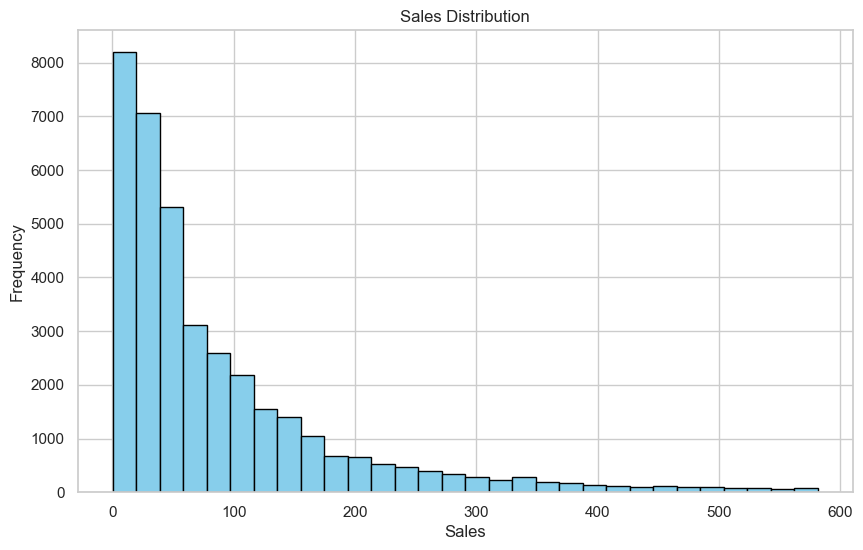

In [12]:
plt.figure(figsize=(10, 6))
plt.hist(df['Sales'], bins=30, color='skyblue', edgecolor='black')
plt.title('Sales Distribution')
plt.xlabel('Sales')
plt.ylabel('Frequency')
plt.show()

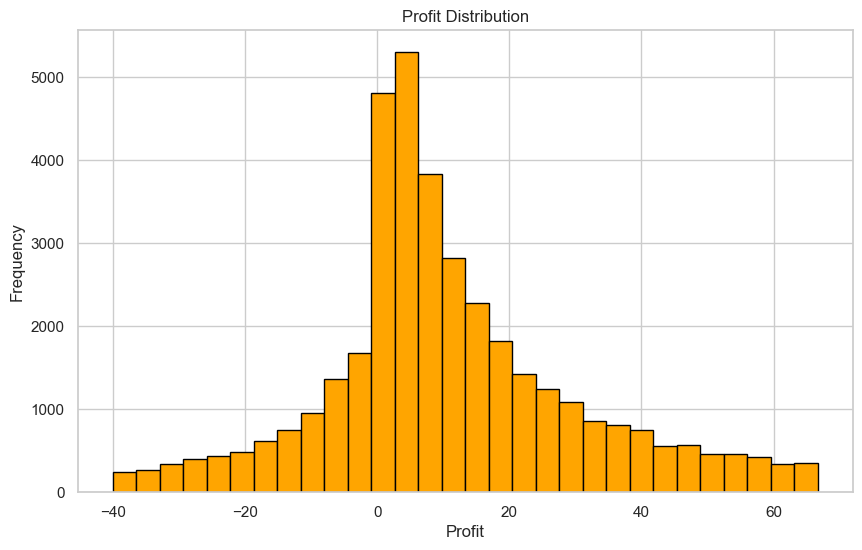

In [13]:
plt.figure(figsize=(10, 6))
plt.hist(df['Profit'], bins=30, color='orange', edgecolor='black')
plt.title('Profit Distribution')
plt.xlabel('Profit')
plt.ylabel('Frequency')
plt.show()

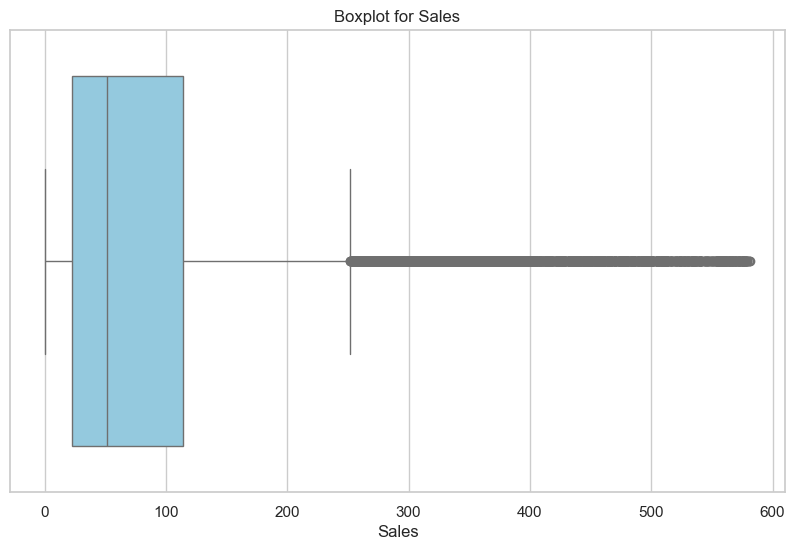

In [14]:
plt.figure(figsize=(10, 6))
sns.boxplot(x=df['Sales'], color='skyblue')
plt.title('Boxplot for Sales')
plt.show()

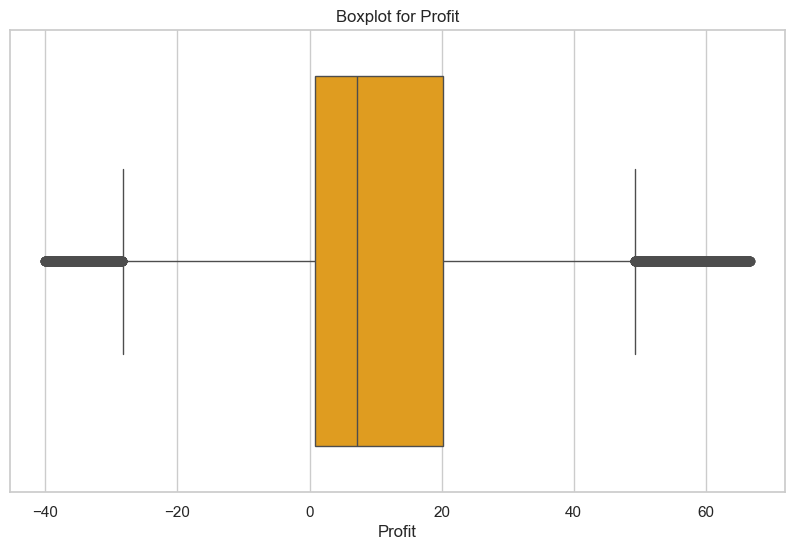

In [15]:
plt.figure(figsize=(10, 6))
sns.boxplot(x=df['Profit'], color='orange')
plt.title('Boxplot for Profit')
plt.show()

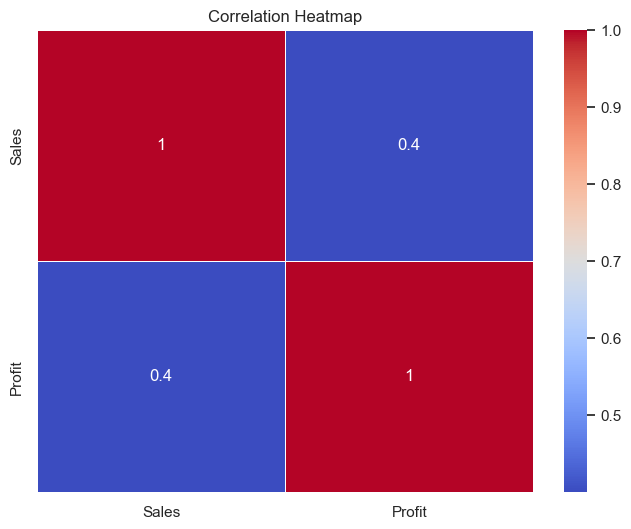

In [16]:
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

In [17]:
df.to_csv('Cleaned_Global_Superstore.csv', index=False)
print("Cleaned dataset saved as 'Cleaned_Global_Superstore.csv'")


Cleaned dataset saved as 'Cleaned_Global_Superstore.csv'
